# HEART DISEASE PREDICTION USING SEVERAL CLASSIFICATION MODELS

# GROUP 4 | CS 513-B | FINAL PROJECT | TRAINING MODEL

# Install Libraries

In [1]:
!pip install missingno

In [2]:
!pip install xgboost

About the dataset: Columns description:-

* Sex: male or female(Nominal)
-Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
-Current Smoker: whether or not the patient is a current smoker (Nominal)
-Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
-BP Meds: whether or not the patient was on blood pressure medication (Nominal)
-Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
-Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
-Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
-Tot Chol: total cholesterol level (Continuous)
-Sys BP: systolic blood pressure (Continuous)
-Dia BP: diastolic blood pressure (Continuous)
-BMI: Body Mass Index (Continuous)
-Heart Rate: heart rate (Continuous - In medical research, variables such as -heart rate though in fact discrete, yet are considered continuous because of -large number of possible values.)
-Glucose: glucose level (Continuous) Predict variable (desired target)
-10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Load Libraries

In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
# import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
# from mlxtend.classifier import StackingCVClassifier

# Load Data

In [4]:
#data = pd.read_csv('framingham.csv')
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


I will use pandas_profiling library to understand the data. It is a nice alternative to using .info and .describe methods. Infact, it gives much more useful informations like % of mising values, mean, maximum, minimum, heatmap depicting correlation, etc.

Conclusions-

Our data contains 4238 rows and 16 columns.
Seems like this data is already preprocessed as there is no categorical columns. Those features have been encoded already. Now, let's see missing values.
Columns having mising values are: 'education'(2.5%), 'cigsPerDay'(0.7%), 'BPMeds'(1.3%), 'totChol'(1.2%) and 'glucose'(9.2%). Except the feature glucose all other missing values are less than 2% of data. We can drop all other missing values but in this project I choose to use SimpleImputer to impute them with most frequent value. As for feature glucose, notice in heatmap that glucose is highly correlated with diabetes. So, I will use feature diabetes to fill missing values in glucose.

# Visualizations - EDA

In [6]:
sns.set(style="whitegrid",palette='Set2')

Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

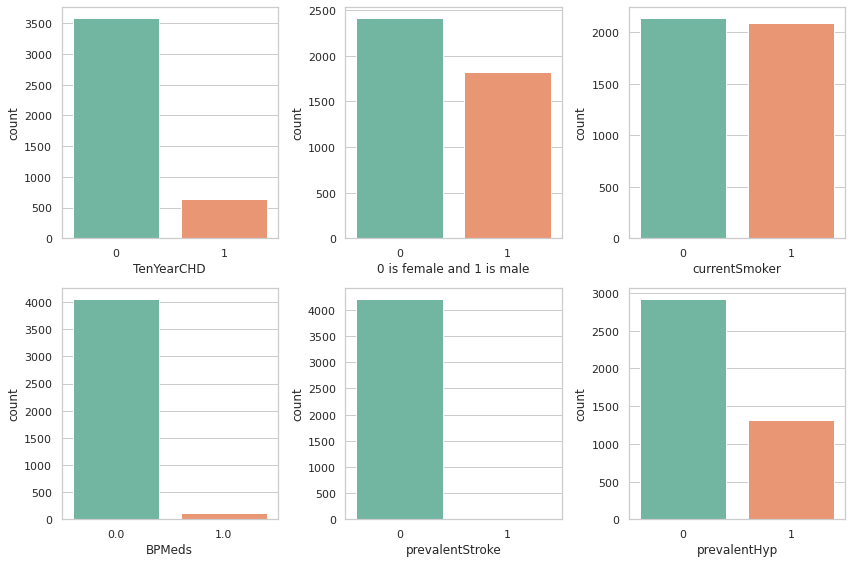

In [7]:
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(data.TenYearCHD,ax=axes[0,0])
sns.countplot(data.male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(data.currentSmoker,ax=axes[0,2])
sns.countplot(data.BPMeds,ax=axes[1,0])
sns.countplot(data.prevalentStroke,ax=axes[1,1])
sns.countplot(data.prevalentHyp,ax=axes[1,2])
plt.tight_layout()

Distribution of continuous variables


/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rtannunisha/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

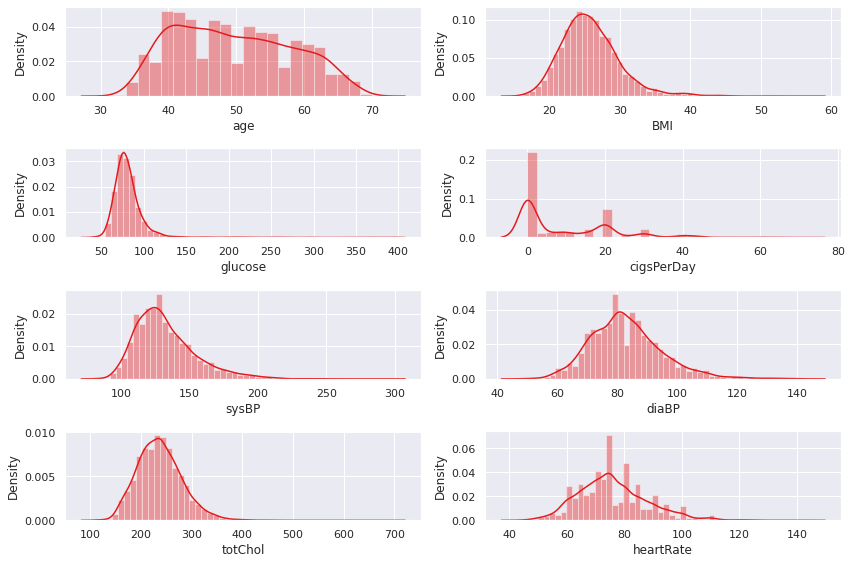

In [8]:
sns.set(style="darkgrid",palette='Set1')
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
sns.distplot(data.age,ax=axes[0,0])
sns.distplot(data.BMI,ax=axes[0,1])
sns.distplot(data.glucose,ax=axes[1,0])
sns.distplot(data.cigsPerDay,ax=axes[1,1])
sns.distplot(data.sysBP,ax=axes[2,0])
sns.distplot(data.diaBP,ax=axes[2,1])
sns.distplot(data.totChol,ax=axes[3,0])
sns.distplot(data.heartRate,ax=axes[3,1])
plt.tight_layout()

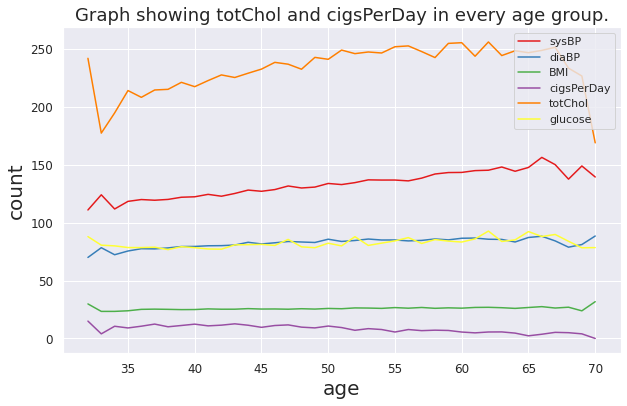

In [9]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.
graph_0 = data.groupby("age").sysBP.mean()
graph_1 = data.groupby("age").diaBP.mean()
graph_2 = data.groupby("age").BMI.mean()
graph_3 = data.groupby("age").cigsPerDay.mean()
graph_4 = data.groupby("age").totChol.mean()
graph_5 = data.groupby("age").glucose.mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=graph_0, label="sysBP")
sns.lineplot(data=graph_1, label="diaBP")
sns.lineplot(data=graph_2, label="BMI")
sns.lineplot(data=graph_3, label="cigsPerDay")
sns.lineplot(data=graph_4, label="totChol")
sns.lineplot(data=graph_5, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

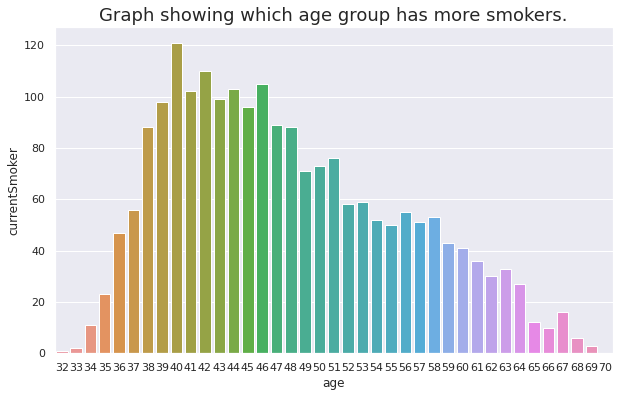

In [10]:
graph = data.groupby("age",as_index=False).currentSmoker.sum()
plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["currentSmoker"])
plt.title("Graph showing which age group has more smokers.",{'fontsize':18});

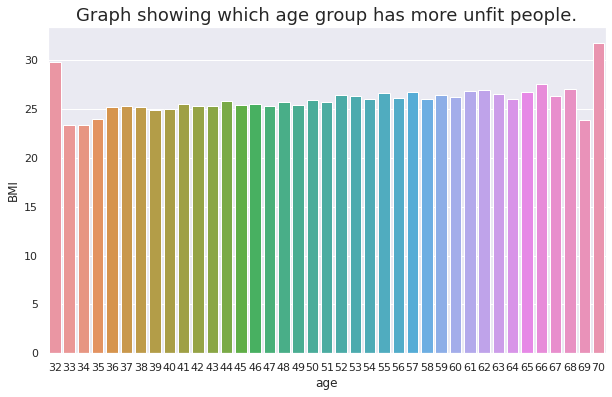

In [11]:
# The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, etc.
graph = data.groupby("age",as_index=False).BMI.mean()
plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["BMI"])
plt.title("Graph showing which age group has more unfit people.",{'fontsize':18});

# Pre-Processing

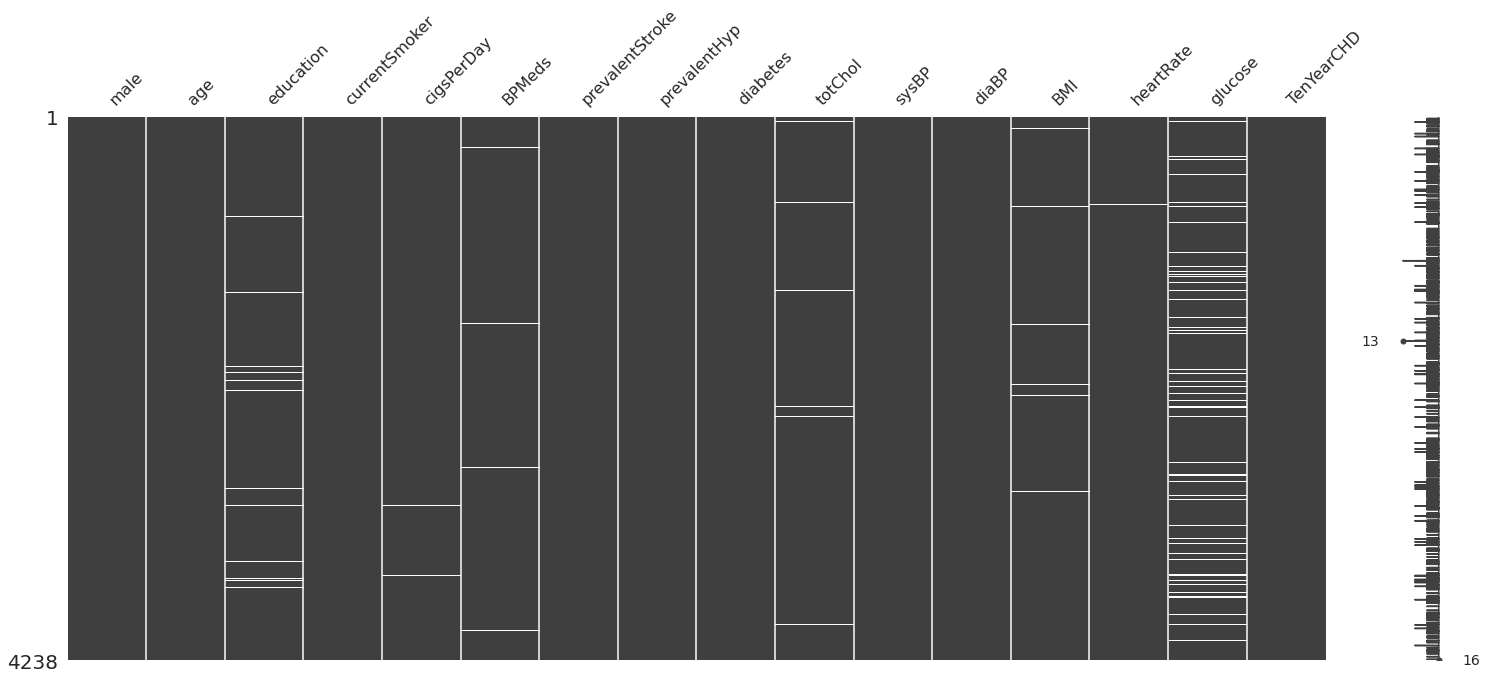

In [12]:
# Let's have a visual look at missing data
import missingno as msno
msno.matrix(data);

<AxesSubplot:>

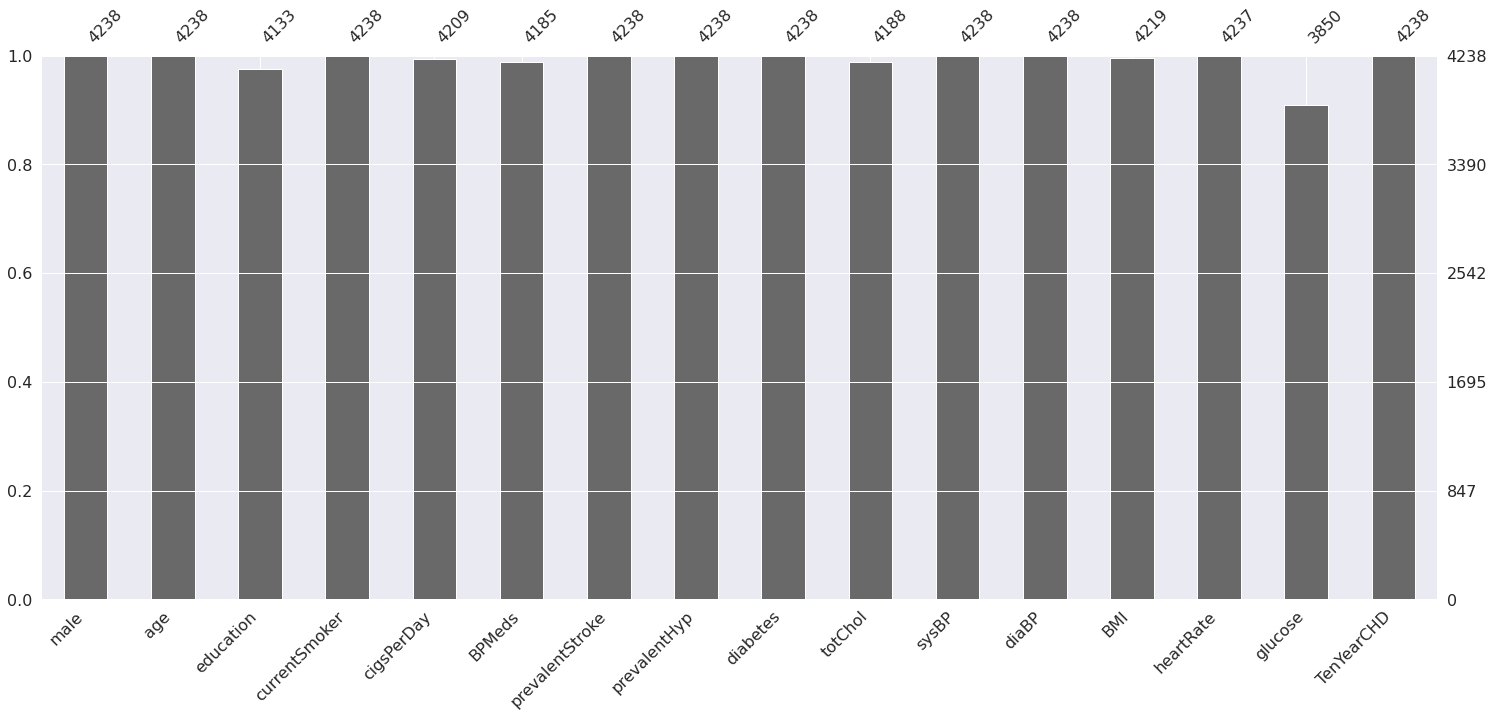

In [13]:
msno.bar(data)

We have a lot of missing values for the glucose column and a few for education, cigsPerDay, BPMeds, totChol, BMI and heartRate

In [14]:
data.groupby('diabetes').mean()['glucose']

diabetes
0     79.489186
1    170.333333
Name: glucose, dtype: float64

In [15]:
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]
    if pd.isnull(glu):
        if dia == 0:
            return 79
        else:
            return 170
    else:
        return glu

data['glucose'] = data[['diabetes','glucose']].apply(impute_glucose,axis=1)

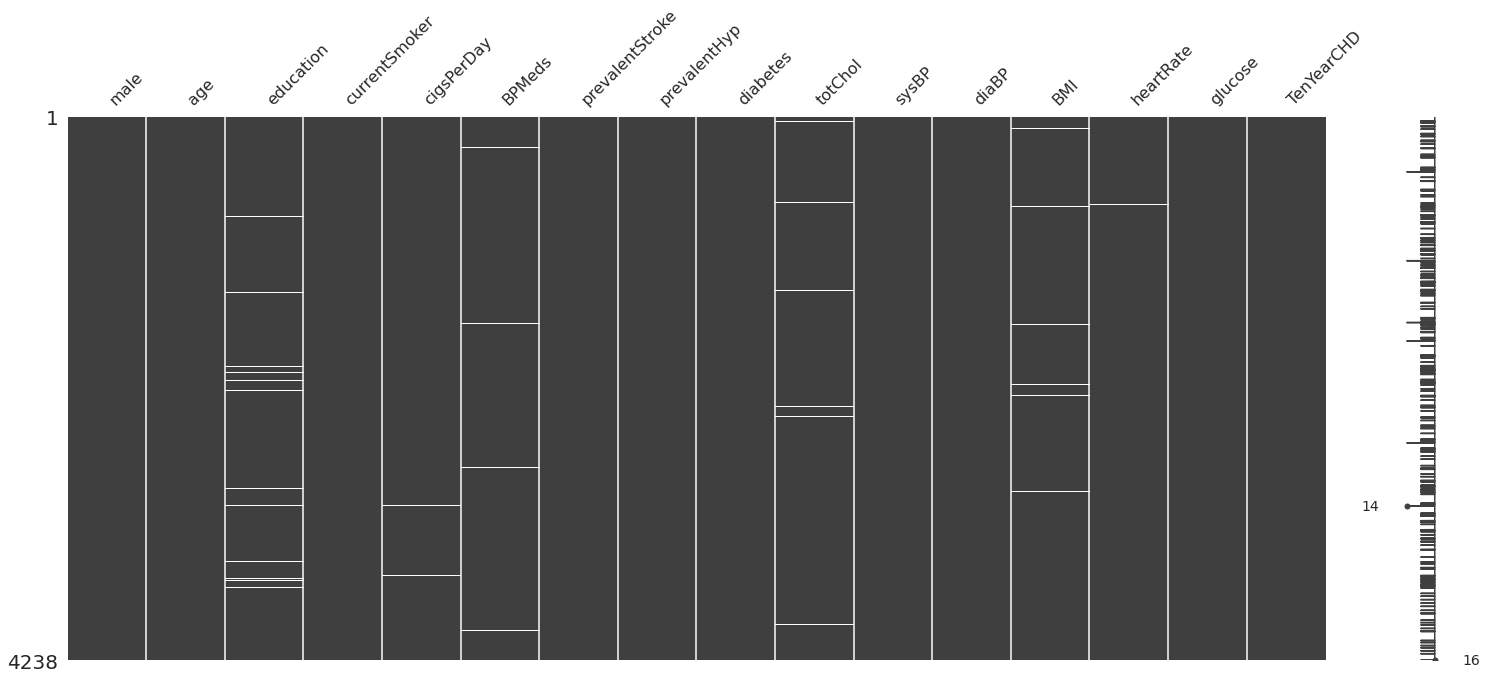

In [16]:
msno.matrix(data);

So, glucose feature has no missing data now.

In [17]:
lst = data.columns.to_list()
#lst.remove('cigsPerDay') # removing beacuse of skewed distribution and high correlation with currentSmoker
#lst.remove('sysBP') # removing because of high correlation with prevalentHyp
# lst.remove('diaBP') # removing because of high correlation with prevalentHyp
lst.remove('prevalentHyp')
lst.remove('currentSmoker')

In [18]:
data = data[lst]

In [19]:
data.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data)
imputed_data = imputer.transform(data)
imputed_data = pd.DataFrame(imputed_data,columns=data.columns)

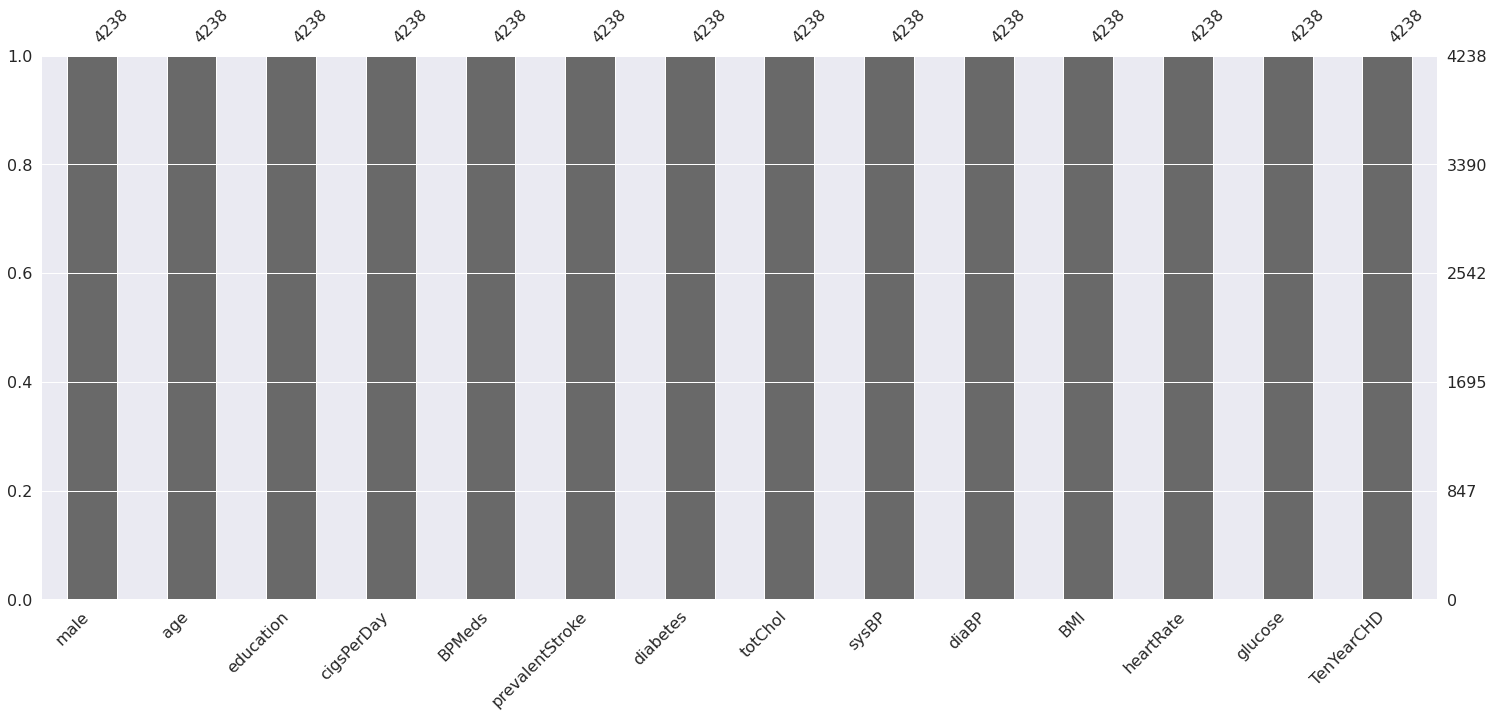

In [21]:
msno.bar(imputed_data);

<AxesSubplot:>

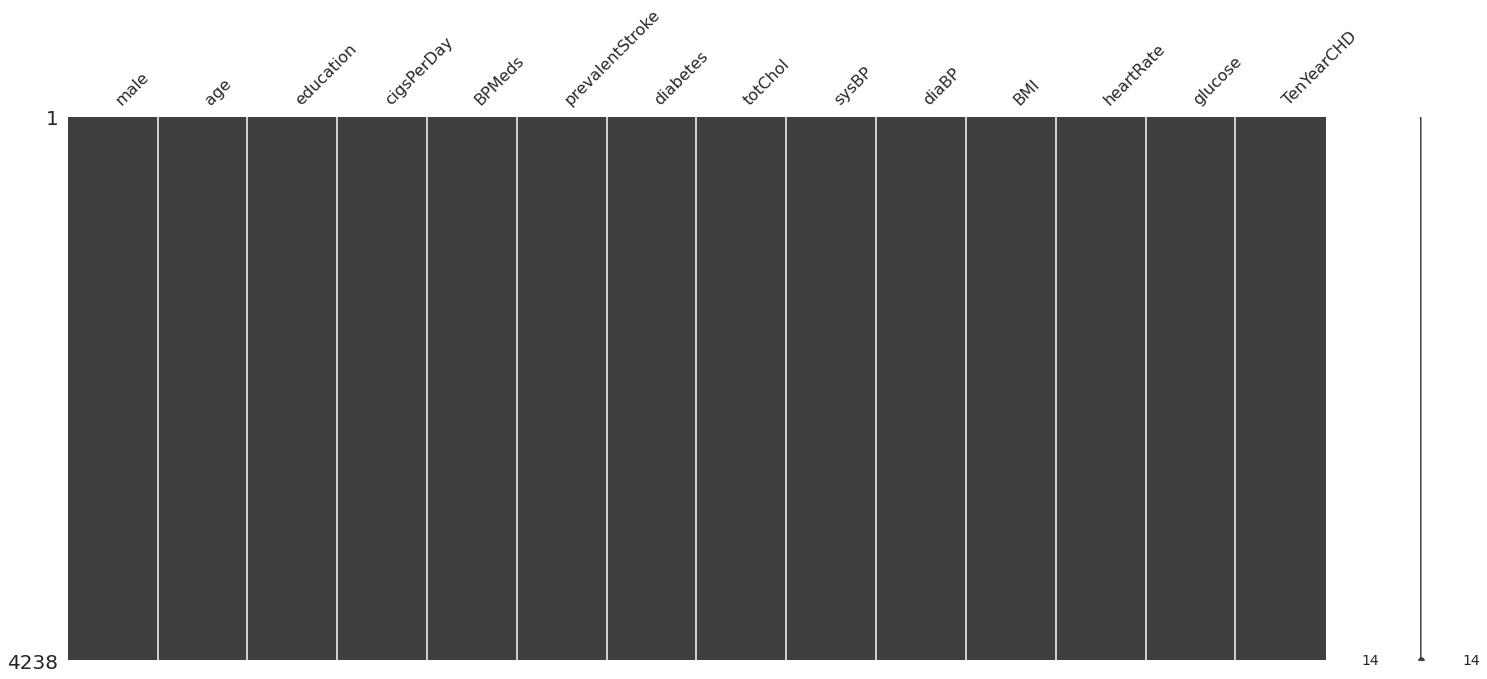

In [22]:
msno.matrix(imputed_data)

In [23]:
# scale the imputed data
# normalize the data
from sklearn import preprocessing

x = imputed_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [24]:
lst = list(imputed_data.columns)

In [25]:
lst

['male',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [26]:
df.columns = lst

# Classification

In [27]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.000000,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.000000,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,0.285714,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,0.428571,0.0,0.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,0.328571,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


<AxesSubplot:xlabel='TenYearCHD', ylabel='Count'>

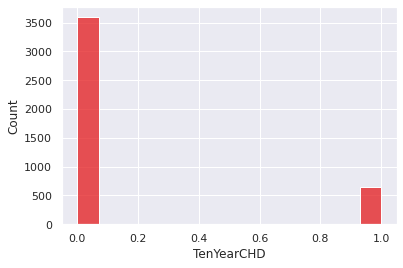

In [28]:
sns.histplot(df.TenYearCHD)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('TenYearCHD',axis=1), 
                                                    df['TenYearCHD'], test_size=0.20, 
                                                    random_state=101)
X_valid, y_valid = X_test, y_test

In [30]:
print(y_test.unique())
Counter(y_train)

[0. 1.]


Counter({0.0: 2853, 1.0: 537})

# Oversampling

In [31]:
from imblearn.combine import *
smote = SMOTETomek(random_state=121)

In [32]:
#Libraries needed for model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0.0: 2823, 1.0: 2823})


# Logistic Regression Classifier

In [35]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[495 246]
 [ 45  62]]


Accuracy of Logistic Regression: 65.68396226415094 

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.77       741
         1.0       0.20      0.58      0.30       107

    accuracy                           0.66       848
   macro avg       0.56      0.62      0.54       848
weighted avg       0.83      0.66      0.71       848



In [36]:
score1=cross_val_score(lr,X_valid, y_valid,cv=10)
print(f"After k-fold cross validation score is {score1.mean()}")

After k-fold cross validation score is 0.8738375350140057


In [37]:
# score2=cross_val_score(lr,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score2.mean()}")

<AxesSubplot:>

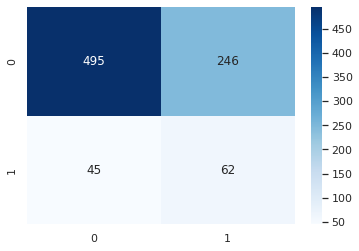

In [38]:
#plt.figure(figsize = (10,5))
sns.heatmap(lr_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [39]:
data = pd.DataFrame(classification_report(lr.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.668016,0.916667,0.772834,540
1.0,0.579439,0.201299,0.298795,308
accuracy,0.656840,0.656840,0.656840,0
macro avg,0.623728,0.558983,0.535814,848
weighted avg,0.635844,0.656840,0.600659,848


# Naive Bayes Classifier

In [40]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[684  57]
 [ 83  24]]


Accuracy of Naive Bayes model: 83.49056603773585 

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       741
         1.0       0.30      0.22      0.26       107

    accuracy                           0.83       848
   macro avg       0.59      0.57      0.58       848
weighted avg       0.82      0.83      0.82       848



In [41]:
score2=cross_val_score(nb,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score2.mean()}")

After k-fold cross validation score is 0.7643697478991596


In [42]:
# score2=cross_val_score(nb,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score2.mean()}")

<AxesSubplot:>

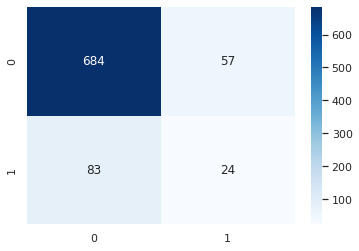

In [43]:
#plt.figure(figsize = (10,5))
sns.heatmap(nb_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [44]:
data = pd.DataFrame(classification_report(nb.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.923077,0.891786,0.907162,767
1.0,0.224299,0.296296,0.255319,81
accuracy,0.834906,0.834906,0.834906,0
macro avg,0.573688,0.594041,0.581240,848
weighted avg,0.856330,0.834906,0.844899,848


# Random Forest Classifier

In [45]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[654  87]
 [ 75  32]]


Accuracy of Random Forest: 80.89622641509435 

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       741
         1.0       0.27      0.30      0.28       107

    accuracy                           0.81       848
   macro avg       0.58      0.59      0.59       848
weighted avg       0.82      0.81      0.81       848



In [46]:
score3=cross_val_score(rf,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score3.mean()}")

After k-fold cross validation score is 0.875


In [47]:
# score3=cross_val_score(rf,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score3.mean()}")

<AxesSubplot:>

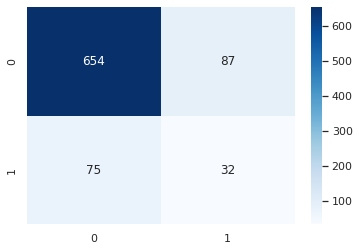

In [48]:
sns.heatmap(rf_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [49]:
data = pd.DataFrame(classification_report(rf.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.882591,0.897119,0.889796,729
1.0,0.299065,0.268908,0.283186,119
accuracy,0.808962,0.808962,0.808962,0
macro avg,0.590828,0.583013,0.586491,848
weighted avg,0.800705,0.808962,0.804670,848


# Extreme Gradient Boost Classifier

In [50]:
m4 = 'Extreme Gradient Boost'
# xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=25,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
#                     reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[677  64]
 [ 95  12]]


Accuracy of Extreme Gradient Boost: 81.25 

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       741
         1.0       0.16      0.11      0.13       107

    accuracy                           0.81       848
   macro avg       0.52      0.51      0.51       848
weighted avg       0.79      0.81      0.80       848



In [51]:
score4=cross_val_score(xgb,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score4.mean()}")

After k-fold cross validation score is 0.8573249299719888


In [52]:
# score4=cross_val_score(xgb,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score4.mean()}")

<AxesSubplot:>

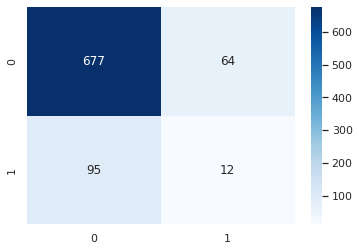

In [53]:
sns.heatmap(xgb_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [54]:
data = pd.DataFrame(classification_report(xgb.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.913630,0.876943,0.894911,772
1,0.112150,0.157895,0.131148,76
accuracy,0.812500,0.812500,0.812500,0
macro avg,0.512890,0.517419,0.513029,848
weighted avg,0.841799,0.812500,0.826460,848


In [55]:
import math 
N = len(X_test)
k = math.sqrt(N)
k

29.120439557122072

# K-NeighborsClassifier Classifier

In [56]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[561 180]
 [ 74  33]]


Accuracy of K-NeighborsClassifier: 70.04716981132076 

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       741
         1.0       0.15      0.31      0.21       107

    accuracy                           0.70       848
   macro avg       0.52      0.53      0.51       848
weighted avg       0.79      0.70      0.74       848



In [57]:
score5=cross_val_score(knn,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score5.mean()}")

After k-fold cross validation score is 0.8714705882352941


Minimum error:- 0.24056603773584906 at K = 1


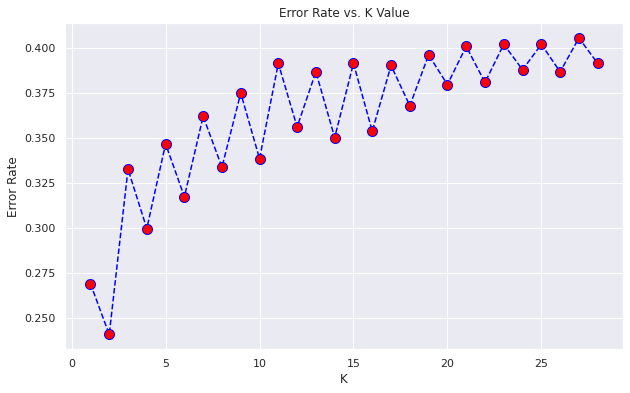

In [58]:
error_rate = []
for i in range(1,29):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,29),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7594339622641509 at K = 1


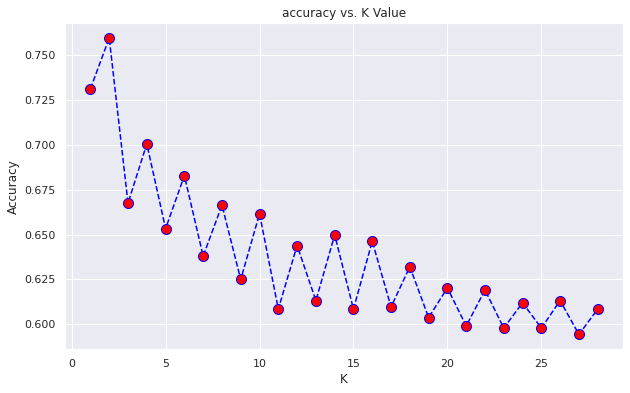

In [59]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,29):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,29),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [60]:
# score5=cross_val_score(knn,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score5.mean()}")

<AxesSubplot:>

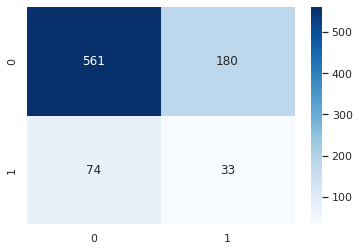

In [61]:
sns.heatmap(knn_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [62]:
data = pd.DataFrame(classification_report(knn.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.619433,0.901768,0.734400,509
1.0,0.532710,0.168142,0.255605,339
accuracy,0.608491,0.608491,0.608491,0
macro avg,0.576072,0.534955,0.495003,848
weighted avg,0.584764,0.608491,0.542995,848


# Decision Tree Classifier

In [63]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[579 162]
 [ 74  33]]


Accuracy of DecisionTreeClassifier: 72.16981132075472 

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       741
         1.0       0.17      0.31      0.22       107

    accuracy                           0.72       848
   macro avg       0.53      0.54      0.52       848
weighted avg       0.80      0.72      0.75       848



In [64]:
score6=cross_val_score(dt,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score6.mean()}")

After k-fold cross validation score is 0.7971848739495797


In [65]:
# score6=cross_val_score(dt,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score6.mean()}")

<AxesSubplot:>

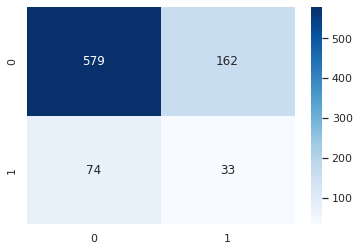

In [66]:
sns.heatmap(dt_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [67]:
data = pd.DataFrame(classification_report(dt.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.781377,0.886677,0.830703,653
1.0,0.308411,0.169231,0.218543,195
accuracy,0.721698,0.721698,0.721698,0
macro avg,0.544894,0.527954,0.524623,848
weighted avg,0.672617,0.721698,0.689935,848


# Support Vector Classifier

In [68]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', gamma=10)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[556 185]
 [ 67  40]]


Accuracy of Support Vector Classifier: 70.28301886792453 

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       741
         1.0       0.18      0.37      0.24       107

    accuracy                           0.70       848
   macro avg       0.54      0.56      0.53       848
weighted avg       0.80      0.70      0.74       848



In [69]:
score7=cross_val_score(svc,X_valid,y_valid,cv=10)
print(f"After k-fold cross validation score is {score7.mean()}")

After k-fold cross validation score is 0.875014005602241


In [70]:
# score7=cross_val_score(svc,df.drop('TenYearCHD',axis=1),df['TenYearCHD'],cv=10)
# print(f"After k-fold cross validation score is {score7.mean()}")

<AxesSubplot:>

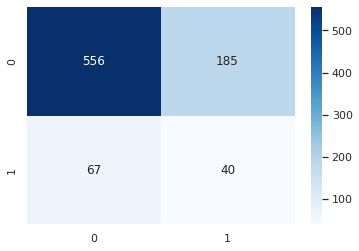

In [71]:
sns.heatmap(svc_conf_matrix, annot=True,fmt='g', cmap='Blues')

In [72]:
data = pd.DataFrame(classification_report(svc.predict(X_valid), 
                                        y_valid, digits=3,
                                        output_dict=True)).T
# print(data.columns)

data['support'] = data.support.apply(int)

data.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.750337,0.892456,0.815249,623
1.0,0.373832,0.177778,0.240964,225
accuracy,0.702830,0.702830,0.702830,0
macro avg,0.562085,0.535117,0.528107,848
weighted avg,0.650439,0.702830,0.662874,848


# Reciver Operating Characterstic (ROC) Curve

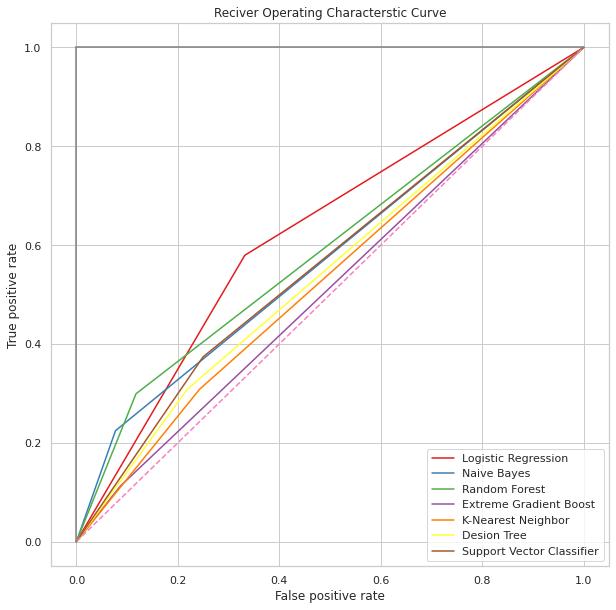

In [73]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


# auc score for each model
lr_auc_score = auc(lr_false_positive_rate,lr_true_positive_rate)
nb_auc_score = auc(nb_false_positive_rate,nb_true_positive_rate)
rf_auc_score = auc(rf_false_positive_rate,rf_true_positive_rate)
xgb_auc_score = auc(xgb_false_positive_rate,xgb_true_positive_rate)
knn_auc_score = auc(knn_false_positive_rate,knn_true_positive_rate)
dt_auc_score = auc(dt_false_positive_rate,dt_true_positive_rate)
svc_auc_score = auc(svc_false_positive_rate,svc_true_positive_rate)


sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Important Feature of Extreme Gradient Boost Classifier

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

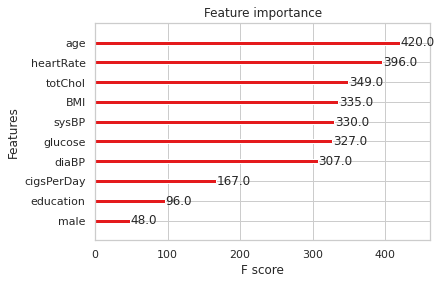

In [74]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10)

# Important Feature of Logistic Regression Classifier

Feature- 0: male, Score: 0.50105
Feature- 1: age, Score: 2.85135
Feature- 2: education, Score: -0.11714
Feature- 3: cigsPerDay, Score: 1.46569
Feature- 4: BPMeds, Score: 0.40321
Feature- 5: prevalentStroke, Score: 0.55526
Feature- 6: diabetes, Score: 0.58336
Feature- 7: totChol, Score: 1.52845
Feature- 8: sysBP, Score: 2.61123
Feature- 9: diaBP, Score: 0.18172
Feature-10: BMI, Score: 0.35624
Feature-11: heartRate, Score: -0.16795
Feature-12: glucose, Score: 1.18480


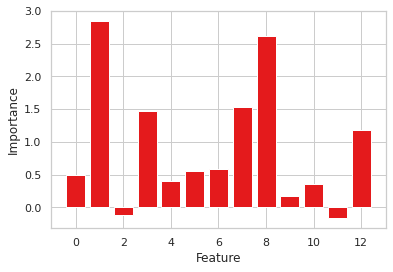

In [75]:
from matplotlib import pyplot
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature-%2d: %s, Score: %.5f' % (i,lst[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance')
pyplot.show()

# ACCURACY COMPARISON

In [76]:
scores = [score1.mean()*100,score2.mean()*100,score3.mean()*100,score4.mean()*100,score5.mean()*100,score6.mean()*100,score7.mean()*100]
scores

[87.38375350140058,
 76.43697478991595,
 87.5,
 85.73249299719889,
 87.1470588235294,
 79.71848739495798,
 87.5014005602241]

In [77]:
models = [m1, m2, m3, m4, m5, m6, m7]
models

['Logistic Regression',
 'Naive Bayes',
 'Random Forest Classfier',
 'Extreme Gradient Boost',
 'K-NeighborsClassifier',
 'DecisionTreeClassifier',
 'Support Vector Classifier']

In [78]:
model_dict = dict(zip(models, scores))
model_dict

{'Logistic Regression': 87.38375350140058,
 'Naive Bayes': 76.43697478991595,
 'Random Forest Classfier': 87.5,
 'Extreme Gradient Boost': 85.73249299719889,
 'K-NeighborsClassifier': 87.1470588235294,
 'DecisionTreeClassifier': 79.71848739495798,
 'Support Vector Classifier': 87.5014005602241}

In [79]:
sorted_models = dict(sorted(model_dict.items(), key=lambda item: item[1]))
sorted_models

{'Naive Bayes': 76.43697478991595,
 'DecisionTreeClassifier': 79.71848739495798,
 'Extreme Gradient Boost': 85.73249299719889,
 'K-NeighborsClassifier': 87.1470588235294,
 'Logistic Regression': 87.38375350140058,
 'Random Forest Classfier': 87.5,
 'Support Vector Classifier': 87.5014005602241}

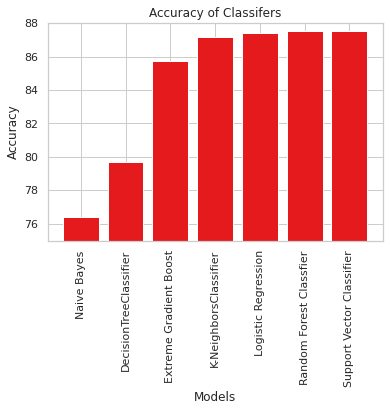

In [80]:

plt.bar(range(len(sorted_models)), sorted_models.values(), align='center')
plt.xticks(range(len(sorted_models)), sorted_models.keys(), rotation=90)
plt.ylim(75, 88)
plt.title("Accuracy of Classifers")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [81]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


In [82]:
len(importances)

13

In [83]:
len(lst)

14

In [84]:
# import pandas as pd

# forest_importances = pd.Series(importances, index=lst)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

Feature- 0: male, Score: 0.02288
Feature- 1: age, Score: 0.19094
Feature- 2: education, Score: 0.03755
Feature- 3: cigsPerDay, Score: 0.06935
Feature- 4: BPMeds, Score: 0.00697
Feature- 5: prevalentStroke, Score: 0.00185
Feature- 6: diabetes, Score: 0.00748
Feature- 7: totChol, Score: 0.11475
Feature- 8: sysBP, Score: 0.12822
Feature- 9: diaBP, Score: 0.10701
Feature-10: BMI, Score: 0.09883
Feature-11: heartRate, Score: 0.11042
Feature-12: glucose, Score: 0.10376


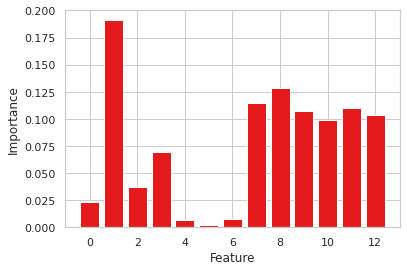

In [85]:
from matplotlib import pyplot
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature-%2d: %s, Score: %.5f' % (i,lst[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance')
pyplot.show()

In [86]:
# print auc score for each model
print('Logistic Regression AUC Score: ',lr_auc_score)
print('Naive Bayes AUC Score: ',nb_auc_score)
print('Random Forest AUC Score: ',rf_auc_score)
print('Extreme Gradient Boost AUC Score: ',xgb_auc_score)
print('K-Nearest Neighbor AUC Score: ',knn_auc_score)
print('Desion Tree AUC Score: ',dt_auc_score)
print('Support Vector Classifier AUC Score: ',svc_auc_score)

Logistic Regression AUC Score:  0.6237277233342162
Naive Bayes AUC Score:  0.573687994248742
Random Forest AUC Score:  0.5908282568390784
Extreme Gradient Boost AUC Score:  0.5128898810649918
K-Nearest Neighbor AUC Score:  0.532748117598093
Desion Tree AUC Score:  0.5448938665859472
Support Vector Classifier AUC Score:  0.5620845788086319


In [87]:
# create the dictionary of models and auc score
auc_lst = {'Logistic Regression':lr_auc_score,'Naive Bayes':nb_auc_score,'Random Forest':rf_auc_score,'Extreme Gradient Boost':xgb_auc_score,'K-Nearest Neighbor':knn_auc_score,'Desion Tree':dt_auc_score,'Support Vector Classifier':svc_auc_score}
# sort the dictionary by auc score
auc_lst = dict(sorted(model_dict.items(), key=lambda item: item[1]))

In [88]:
auc_lst

{'Naive Bayes': 76.43697478991595,
 'DecisionTreeClassifier': 79.71848739495798,
 'Extreme Gradient Boost': 85.73249299719889,
 'K-NeighborsClassifier': 87.1470588235294,
 'Logistic Regression': 87.38375350140058,
 'Random Forest Classfier': 87.5,
 'Support Vector Classifier': 87.5014005602241}

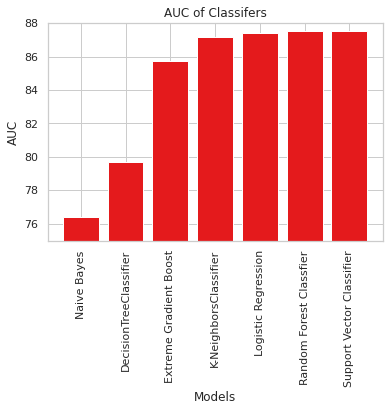

In [89]:
plt.bar(range(len(auc_lst)), auc_lst.values(), align='center')
plt.xticks(range(len(auc_lst)), auc_lst.keys(), rotation=90)
plt.ylim(75, 88)
plt.title("AUC of Classifers")
plt.xlabel('Models')
plt.ylabel('AUC')
plt.show()